# Step 1: Data Preparation


**Owner**: Sonal Kiran Hansra<br>**Last Update**: July 27, 2023

In [46]:
# from platform import python_version
# print(python_version())
import warnings
warnings.filterwarnings("ignore")

## Introduction

**For this project we have collected data from 3 different sources -**
- bike rental data from Capital Bike Share
- weather data from NOAA's National Climatic Data Center
- holidays data from DC Department of Human Resources

**<span style='color: DarkRed;'>The data spans over 11.5 years, from Jan-2012 till Jun-2023, and is split across multiple files. Let's look at these files to ascertain the best method to combine these files and create a single dataset.</span>**

This is what each variable in our dataset means:

**Capital Bikeshare Data***
- ride_id -  includes ID number of the ride
- rideable_type - indicates whether the type of bike was "classic", "docked" or "electric"
- started_at - includes start date and time
- ended_at - includes end date and time
- start_station_name - includes starting station name
- start_station_id - includes starting station number
- end_station_name - includes ending station name
- end_station_id - includes ending station number
- start_lat - includes starting station latitude
- start_lng - includes starting station longitude
- end_lat - includes ending station latitude
- end_lng - includes ending station longitude
- member_casual -  indicates whether user was a "registered" member or a "casual" rider

>**\*** The data columns change slightly after March 2020. For this reason, the data is currently divided into two separate files, one for data from Jan, 2012 till March, 2020 and the other for data from April, 2020 till June, 2023.


**Weather Data**
- station - station ID
- name - name of weather station
- date - date of obseravtion
- avg_wind_speed - average wind speed
- num_days_multiday_prcp - number of days included in the multiday precipitation total 
- multiday_prcp - multiday precipitation total
- peak_gust_time - peak gust time
- prcp - precipitation
- snowfall - snowfall
- snowdepth - snow depth
- temp_avg - average temperature
- temp_max - maximum temperature
- temp_min - minimum temperature
- temp_obs - temperature at the time of observation
- dir_fastest_2min_wind - direction of fastest 2-minute wind
- dir_fastest_5min_wind - direction of fastest 5-minute wind
- speed_fastest_2min_wind - fastest 2-minute wind speed
- speed_fastest_5min_wind - fastest 5-minute wind speed
- wt: weather type
	- wt_fog - fog, ice fog, or freezing fog (may include heavy fog)
	- wt_heavy_fog - heavy fog or heaving freezing fog (not always distinguished from fog)
	- wt_thunder - thunder
	- wt_sleet - ice pellets, sleet, snow pellets, or small hail
	- wt_hail - hail
	- wt_glaze - glaze or rime
	- wt_smoke - smoke or haze
	- wt_drift_snow - blowing or drifting snow
	- wt_high_winds - high or damaging winds
	- wt_mist - mist
	- wt_drizzle - drizzle
	- wt_freeze_drizzle - freezing drizzle
	- wt_rain - rain (may include freezing rain, drizzle, and freezing drizzle)
	- wt_freeze_rain - freezing rain
	- wt_snow - snow, snow pellets, snow grains, or ice crystals
	- wt_ground_fog - ground fog
	- wt_freeze_fog - ice fog or freezing fog

**Holiday Data**
- date - date
- weekend - indicates whether it was a weekend
- holiday - indicates whether it was a holiday
- weekend_holiday - indicates whether it was either a weekend or a holiday

**<span style='color: DarkRed;'>The objective of this notebook is to explore the raw data, do basic data cleaning, combine the cleaned datasets and prepare it for Exploratory Data Analysis. We will also make note of issues in </span>** **<span style='color: blue;'>blue</span>** **<span style='color: DarkRed;'>which will have to be handled during EDA.</span>**

In [47]:
# importing libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

**1. Bike Sharing Data**

In [48]:
# loading data

old_bike_data = pd.read_csv('/Users/sonalkiranhansra/Desktop/BrainStation_Sonal/Classes/Capstone/data/bikeshare_data/unzipped/old_combined_bikeshare.csv')
new_bike_data = pd.read_csv('/Users/sonalkiranhansra/Desktop/BrainStation_Sonal/Classes/Capstone/data/bikeshare_data/unzipped/new_combined_bikeshare.csv')


In [49]:
# verifying that the files loaded properly

print("Old Bike Data\n")
print(old_bike_data.head())
print("Data Shape: ", old_bike_data.shape)

print("\nNew Bike Data\n")
print(new_bike_data.head())
print("Data Shape: ", new_bike_data.shape)

Old Bike Data

  Duration           Start date             End date Start station number  \
0      475  2012-01-01 00:04:00  2012-01-01 00:11:56                31245   
1     1162  2012-01-01 00:10:05  2012-01-01 00:29:28                31400   
2     1145  2012-01-01 00:10:23  2012-01-01 00:29:28                31400   
3      485  2012-01-01 00:15:41  2012-01-01 00:23:46                31101   
4      471  2012-01-01 00:15:42  2012-01-01 00:23:34                31102   

                    Start station End station number              End station  \
0    7th & R St NW / Shaw Library              31109            7th & T St NW   
1  Georgia & New Hampshire Ave NW              31103     16th & Harvard St NW   
2  Georgia & New Hampshire Ave NW              31103     16th & Harvard St NW   
3                  14th & V St NW              31602  Park Rd & Holmead Pl NW   
4             11th & Kenyon St NW              31109            7th & T St NW   

  Bike number Member type  
0      

**<span style='color: DarkRed;'>This bike-sharing data contains ~35M rows and is takes about 5.3GB of space! It is time and memory intensive to work with such huge files. So let's first look at the granularity of the data and the data columns to filter what we need and hopefully reduce the size of the data in the process.</span>**

In [50]:
# looking at the data columns

print("Old Bike Data Columns\n")
print(old_bike_data.columns)
print("\nNew Bike Data Columns\n")
print(new_bike_data.columns)

Old Bike Data Columns

Index(['Duration', 'Start date', 'End date', 'Start station number',
       'Start station', 'End station number', 'End station', 'Bike number',
       'Member type'],
      dtype='object')

New Bike Data Columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')


**<span style='color: DarkRed;'>Since the demand forecast model that we aim to build is at the daily level, we can roll-up our data and reduce the numebr of rows. Additionally, there are several irrelevant columns. We will only require the start date and member type columns.</span>**

In [51]:
# dropping columns

old_bike_data = old_bike_data.drop(['Duration', 'End date', 'Start station number',
       'Start station', 'End station number', 'End station', 'Bike number'], axis=1)

new_bike_data = new_bike_data.drop(['ride_id', 'rideable_type', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng'], axis=1)

In [52]:
# verifying

print(old_bike_data.head())
print(new_bike_data.head())

            Start date Member type
0  2012-01-01 00:04:00      Member
1  2012-01-01 00:10:05      Casual
2  2012-01-01 00:10:23      Member
3  2012-01-01 00:15:41      Member
4  2012-01-01 00:15:42      Member
            started_at member_casual
0  2020-04-25 17:28:39        casual
1  2020-04-06 07:54:59        member
2  2020-04-22 17:06:18        casual
3  2020-04-16 15:22:40        casual
4  2020-04-10 13:19:41        member


**<span style='color: DarkRed;'>Now let's rename the columns and merge our datasets.</span>**

In [53]:
# removing rows containing columns names

old_bike_data = old_bike_data[old_bike_data['Start date']!='Start date']
print(old_bike_data.shape)

# formatting date and member type columns

old_bike_data['date'] = pd.to_datetime(old_bike_data['Start date'])
old_bike_data['date'] = old_bike_data['date'].dt.date
old_bike_data.drop(columns=['Start date'], inplace=True)
old_bike_data.rename(columns={'Member type':'member_type'}, inplace=True)
print(old_bike_data.head())

(25253780, 2)
  member_type        date
0      Member  2012-01-01
1      Casual  2012-01-01
2      Member  2012-01-01
3      Member  2012-01-01
4      Member  2012-01-01


In [54]:
# removing rows containing columns names

new_bike_data = new_bike_data[new_bike_data['started_at']!='started_at']
print(new_bike_data.shape)

# formatting date and member type columns

new_bike_data['date'] = pd.to_datetime(new_bike_data['started_at'])
new_bike_data['date'] = new_bike_data['date'].dt.date
new_bike_data.drop(columns=['started_at'], inplace=True)
new_bike_data.rename(columns={'member_casual':'member_type'}, inplace=True)
print(new_bike_data.head())

(9860140, 2)
  member_type        date
0      casual  2020-04-25
1      member  2020-04-06
2      casual  2020-04-22
3      casual  2020-04-16
4      member  2020-04-10


In [55]:
# merging the old and new data files

bike_data = pd.concat([old_bike_data, new_bike_data], axis=0).reset_index(drop=True)

# verifying

bike_data.shape[0] == old_bike_data.shape[0]+new_bike_data.shape[0]

True

**<span style='color: DarkRed;'>Now that we have merged the two datasets, let's export it for future use. Now that we have filtered what we need, let's look at it in more detail.</span>**

In [56]:
# exporting bike_data

# bike_data.to_csv('/Users/sonalkiranhansra/Desktop/BrainStation_Sonal/Classes/Capstone/data/cleaned_data/bike_data.csv')

In [57]:
# looking at bike_data info

print(bike_data.info())

# let's convert 'date' column to datetime

bike_data.date = pd.to_datetime(bike_data.date)

# verifying
print(bike_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35113920 entries, 0 to 35113919
Data columns (total 2 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   member_type  object
 1   date         object
dtypes: object(2)
memory usage: 535.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35113920 entries, 0 to 35113919
Data columns (total 2 columns):
 #   Column       Dtype         
---  ------       -----         
 0   member_type  object        
 1   date         datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 535.8+ MB
None


In [58]:
# looking at unique values in member_type column

print(bike_data.member_type.unique())

['Member' 'Casual' 'Unknown' 'casual' 'member']


In [59]:
# changing all values to lower case and checking unique values again

bike_data.member_type = bike_data.member_type.apply(lambda x: x.lower())

# verifying

print(bike_data.member_type.unique())

['member' 'casual' 'unknown']


In [60]:
# looking at value counts by member_type

print(bike_data.member_type.value_counts())
print('\n')
print(bike_data.member_type.value_counts()/bike_data.shape[0])

member_type
member     25902398
casual      9211478
unknown          44
Name: count, dtype: int64


member_type
member     0.737668
casual     0.262331
unknown    0.000001
Name: count, dtype: float64


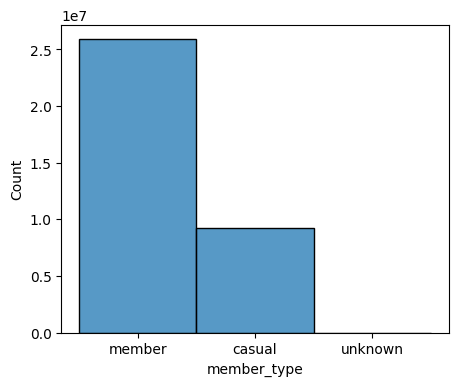

In [70]:
# visualizing

plt.figure(figsize=(5,4))
sns.histplot(data=bike_data, x='member_type')
plt.show()

**<span style='color: DarkRed;'>`unknown` makes up a very insignificant proportion of our data (0.0001%). Since we require continuity in our data to build a timeseries model, we will not be dropping these rows. Instead these rows will be handled appropriately when we one-hot-encode the `member_type` column.</span>**

In [72]:
# let's look at the data again

bike_data.head()

,member_type,date
0,member,2012-01-01
1,casual,2012-01-01
2,member,2012-01-01
3,member,2012-01-01
4,member,2012-01-01


**<span style='color: DarkRed;'>We can see that the data is split across multiple rows for each day as each row corresponds to a single bike renting event. Since we want to forecast the demand at the daily level, we should roll-up our data. But before we do that, we will have to appropriately handle the `member_type` column. Because we expect this variable to impact the bike renting frequency, we would like to retain this data as we roll-up. We'll split this column across `member` and `casual` columns, effectively one-hot-encoding this data. Since `unknown` makes up a very very small proportion of our data (0.0001%), we don't have to worry about retaining that data.</span>**

In [73]:
# creating new columns for `member` and `casual` member_type

bike_data['member'] = bike_data.member_type.apply(lambda x: 1 if x=='member' else 0)
bike_data['casual'] = bike_data.member_type.apply(lambda x: 1 if x=='casual' else 0)

# dropping member_type column

bike_data.drop(columns='member_type', inplace=True)

# verifying

print(bike_data.head())
print('\n')
print('Total member: ', bike_data.member.sum())
print('\n')
print('Total casual: ', bike_data.casual.sum())

        date  member  casual
0 2012-01-01       1       0
1 2012-01-01       0       1
2 2012-01-01       1       0
3 2012-01-01       1       0
4 2012-01-01       1       0


Total member:  25902398


Total casual:  9211478


In [74]:
# let's look at the data again

bike_data.head()

,date,member,casual
0,2012-01-01,1,0
1,2012-01-01,0,1
2,2012-01-01,1,0
3,2012-01-01,1,0
4,2012-01-01,1,0


**<span style='color: DarkRed;'>Perfect, now we can finally roll-up our data!</span>**

In [75]:
# rolling-up data

bikeshare_data = bike_data.groupby('date', as_index=False)[['member', 'casual']].sum()

# verifying

print(bikeshare_data.head())
print('\n')
print(bikeshare_data.shape)

        date  member  casual
0 2012-01-01    1572     688
1 2012-01-02    1693     244
2 2012-01-03    2130      89
3 2012-01-04    2262      95
4 2012-01-05    3111     140


(4195, 3)


In [77]:
# checking for missing dates in date column

pd.date_range(end=max(bikeshare_data.date), start=min(bikeshare_data.date)).shape

(4199,)

>**<span style='color: blue;'>It seems there are 4 missing dates in our dataset! We will have to add these dates and impute these new rows appropriately when we move on to EDA.</span>**

**2. Weather Data**

In [88]:
# loading data

weather_data = pd.read_csv('/Users/sonalkiranhansra/Desktop/BrainStation_Sonal/Classes/Capstone/data/noaa_weather_data/weather_dec2011_jul2023.csv')
display(weather_data.head(10))
print('\nData shape: ', weather_data.shape)

,station,name,date,avg_wind_speed,num_days_multiday_prcp,multiday_prcp,peak_gust_time,prcp,snowfall,snowdepth,...,wt_drift_snow,wt_high_winds,wt_mist,wt_drizzle,wt_freeze_drizzle,wt_rain,wt_freeze_rain,wt_snow,wt_ground_fog,wt_freeze_fog
0,USC00182325,"DALECARLIA RESERVOIR, MD US",31/12/2011,NaN,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00013743,"WASHINGTON REAGAN NATIONAL AIRPORT, VA US",31/12/2011,8.50,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,USC00186350,"NATIONAL ARBORETUM DC, MD US",31/12/2011,NaN,NaN,NaN,NaN,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00182325,"DALECARLIA RESERVOIR, MD US",01/01/2012,NaN,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00013743,"WASHINGTON REAGAN NATIONAL AIRPORT, VA US",01/01/2012,8.72,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
5,USC00186350,"NATIONAL ARBORETUM DC, MD US",01/01/2012,NaN,NaN,NaN,NaN,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,USC00182325,"DALECARLIA RESERVOIR, MD US",02/01/2012,NaN,NaN,NaN,NaN,0.06,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,USW00013743,"WASHINGTON REAGAN NATIONAL AIRPORT, VA US",02/01/2012,13.87,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,USC00186350,"NATIONAL ARBORETUM DC, MD US",02/01/2012,NaN,NaN,NaN,NaN,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,USC00182325,"DALECARLIA RESERVOIR, MD US",03/01/2012,NaN,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Data shape:  (12323, 35)


In [95]:
# understanding the data

display(weather_data.describe())
print('\nData Info:\n')
print(weather_data.info())
print('\nNull proportions:\n')
print(round(weather_data.isna().sum()/weather_data.shape[0],3))

,avg_wind_speed,num_days_multiday_prcp,multiday_prcp,peak_gust_time,prcp,snowfall,snowdepth,temp_avg,temp_max,temp_min,...,wt_drift_snow,wt_high_winds,wt_mist,wt_drizzle,wt_freeze_drizzle,wt_rain,wt_freeze_rain,wt_snow,wt_ground_fog,wt_freeze_fog
count,4222.000000,35.000000,35.000000,1.0,12213.000000,10940.000000,10834.000000,3521.000000,12070.000000,12137.000000,...,3.0,10.0,123.0,46.0,2.0,193.0,1.0,35.0,1.0,1.0
mean,8.415047,2.142857,0.500000,1235.0,0.128017,0.031197,0.058667,59.938938,67.912262,49.313339,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,3.269214,0.355036,0.645723,NaN,0.349117,0.372567,0.628126,16.710128,17.973042,16.963855,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN
min,1.120000,2.000000,0.000000,1235.0,0.000000,0.000000,0.000000,13.000000,12.000000,2.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,6.040000,2.000000,0.000000,1235.0,0.000000,0.000000,0.000000,46.000000,53.000000,35.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,7.830000,2.000000,0.170000,1235.0,0.000000,0.000000,0.000000,61.000000,70.000000,49.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,10.290000,2.000000,0.930000,1235.0,0.060000,0.000000,0.000000,75.000000,84.000000,65.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,29.970000,3.000000,2.200000,1235.0,4.800000,14.000000,22.000000,91.000000,105.000000,83.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0



Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12323 entries, 0 to 12322
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   station                  12323 non-null  object 
 1   name                     12323 non-null  object 
 2   date                     12323 non-null  object 
 3   avg_wind_speed           4222 non-null   float64
 4   num_days_multiday_prcp   35 non-null     float64
 5   multiday_prcp            35 non-null     float64
 6   peak_gust_time           1 non-null      float64
 7   prcp                     12213 non-null  float64
 8   snowfall                 10940 non-null  float64
 9   snowdepth                10834 non-null  float64
 10  temp_avg                 3521 non-null   float64
 11  temp_max                 12070 non-null  float64
 12  temp_min                 12137 non-null  float64
 13  temp_obs                 8010 non-null   float64
 14  dir_faste

**<span style='color: DarkRed;'>We can see that the weather data for any given day is split across multiple rows. Also, there is a lot of missing data! Let's look at the unique values for the `station` and `name` columns.</span>**

In [91]:
# looking at unique values

for col in ['station', 'name']:
    print(col)
    print(weather_data[col].unique())
    print('\n')  

station
['USC00182325' 'USW00013743' 'USC00186350']


name
['DALECARLIA RESERVOIR, MD US' 'WASHINGTON REAGAN NATIONAL AIRPORT, VA US'
 'NATIONAL ARBORETUM DC, MD US']




>**<span style='color: blue;'>So we have observations from 3 stations informing the weather data for any given day. We will have to group this data by date to be able to use it for our timeseries model. Which means we have to figure out the best way to merge data from the 3 different stations. We also need to change the data type of the `date` column from 'object' to 'datetime'. We will handle these requirements when we get to EDA.</span>**

**3. Holiday Data**

In [99]:
# loading data

holiday_data = pd.read_csv('/Users/sonalkiranhansra/Desktop/BrainStation_Sonal/Classes/Capstone/data/holidays/holidays_weekends_2012_2023.csv')

print('Data shape: ', holiday_data.shape)
print('\nData head\n')
display(holiday_data.head())

Data shape:  (4383, 4)

Data head



,date,weekend,holiday,weekend_holiday
0,01/01/2012,1,0,1
1,02/01/2012,0,1,1
2,03/01/2012,0,0,0
3,04/01/2012,0,0,0
4,05/01/2012,0,0,0


In [98]:
# understanding the data

display(holiday_data.describe())
print('\nData Info:\n')
print(holiday_data.info())
print('\nNull proportions:\n')
print(round(holiday_data.isna().sum()/holiday_data.shape[0],3))

,weekend,holiday,weekend_holiday
count,4383.000000,4383.000000,4383.000000
mean,0.285877,0.031029,0.316906
std,0.451883,0.173416,0.465324
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000



Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             4383 non-null   object
 1   weekend          4383 non-null   int64 
 2   holiday          4383 non-null   int64 
 3   weekend_holiday  4383 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 137.1+ KB
None

Null proportions:

date               0.0
weekend            0.0
holiday            0.0
weekend_holiday    0.0
dtype: float64


In [100]:
# checking for multiple date entries

holiday_data.date.nunique() == holiday_data.shape[0]

True

>**<span style='color: blue;'>This data seems to be pretty clean and without duplicates. We should be able to use this data as it is, we just need to change the data type of the `date` column from 'object' to 'datetime'. We will handle this when we get to EDA.</span>**

**#############################  End Of Document   #############################**